In [1]:
# --- 1. Librerie ---------------------------------------------
from pathlib import Path, PurePosixPath
import os
import re, json, functools
from PIL import Image
from io import BytesIO
import ipywidgets as widgets
from IPython.display import HTML, display
import uuid, ipywidgets as widgets

import matplotlib.pyplot as plt
import matplotlib.animation as anim
import ipywidgets as w

import pandas as pd
from datetime import datetime, timedelta


In [2]:
lista_nuove_date = []

In [6]:
# --- 2. Raccolgo l’elenco dei frame --------------------------

id = "7001328"  #"Juliette"  # ID del ciclone
frames_dir = Path(f"./anim_frames/anim_frames_{id}")
paths = sorted(Path(frames_dir).glob("*.png"), key=lambda p: int(re.search(r"\d+", p.stem).group()))
n = len(paths)  
print(f"Carico i frame da {frames_dir} ({n} frame)")

#video_path = "ciclone7001358.mp4" 

Carico i frame da anim_frames/anim_frames_7001328 (1261 frame)


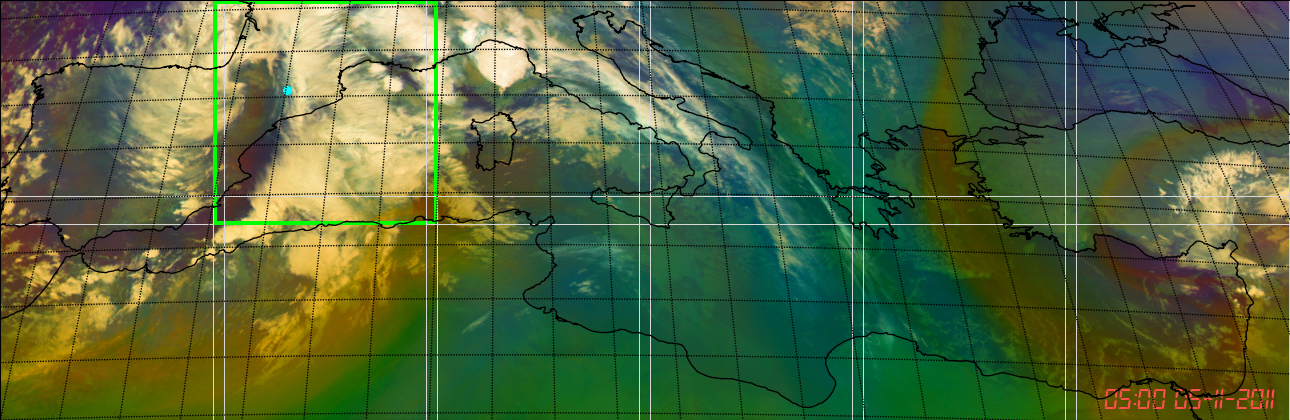

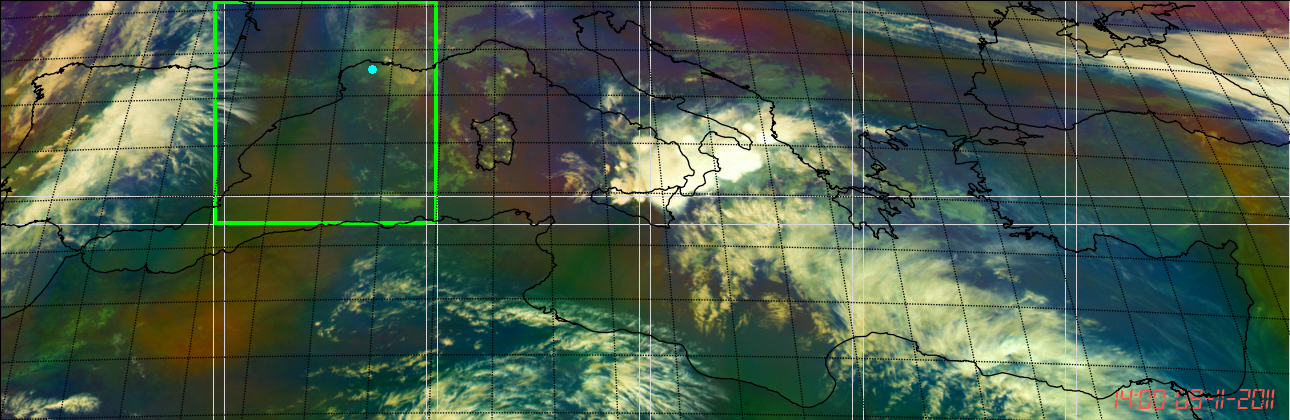

In [7]:
img = Image.open(paths[0])
display(img)
img = Image.open(paths[-1])
display(img)

# HTML del player + due pulsanti legati al widget-manager

In [3]:
# ---------------------------------------------------------------
# 3) cache in RAM dei frame ridotti (lru_cache)
# ---------------------------------------------------------------
@functools.lru_cache(maxsize=512)           # 512 frame ≃ 40-50 MB
def load_jpeg(idx, max_side=720, quality=80):
    img = Image.open(paths[idx])
    img.thumbnail((max_side, max_side), Image.Resampling.LANCZOS)
    if img.mode not in ("RGB", "L"):
        img = img.convert("RGB")
    buf = BytesIO()
    img.save(buf, format="JPEG", quality=quality)
    return buf.getvalue()

# ---------------------------------------------------------------
# 4) widget: Play ⇄ Slider + Image + pulsanti IN/OUT
# ---------------------------------------------------------------
play   = w.Play(value=0, min=0, max=n-1, step=1, interval=40)  # 25 fps
slider = w.IntSlider(value=0, min=0, max=n-1, step=1,
                     readout=False, layout=w.Layout(width='70%'))
w.jslink((play, 'value'), (slider, 'value'))

img_box = w.Image(format='jpeg')
log     = w.Output(layout={'border':'1px solid lightgray', 'max_height':'120px',
                           'overflow_y':'auto'})

btn_in  = w.Button(description="Segna INIZIO", button_style='success')
btn_out = w.Button(description="Segna FINE",   button_style='info')

start = w.Text(description='INIZIO', disabled=True)
end   = w.Text(description='FINE',   disabled=True)

# ---------------------------------------------------------------
# 5) callback per mostrare il frame e per i pulsanti
# ---------------------------------------------------------------
def show(idx):
    img_box.value = load_jpeg(idx)

slider.observe(lambda c: show(c['new']), names='value')
show(0)                       # visualizza il primo

def make_handler(target):
    def handler(_):
        idx = slider.value
        fname = paths[idx].name
        target.value = fname
        with log:
            print(f"{fname}")
    return handler

btn_in.on_click(make_handler(start))
btn_out.on_click(make_handler(end))

# ---------------------------------------------------------------
# 6) layout e display
# ---------------------------------------------------------------
ui = w.VBox([
        w.HBox([play, slider]),
        img_box,
        w.HBox([btn_in, btn_out]),
        w.HBox([start, end]),
        log,
])
display(ui)


In [128]:
start.value, end.value

('frame_1087.png', 'frame_1692.png')

Visualizzo i frame anim_frames_Juliette/frame_0288.png e anim_frames_Juliette/frame_1084.png


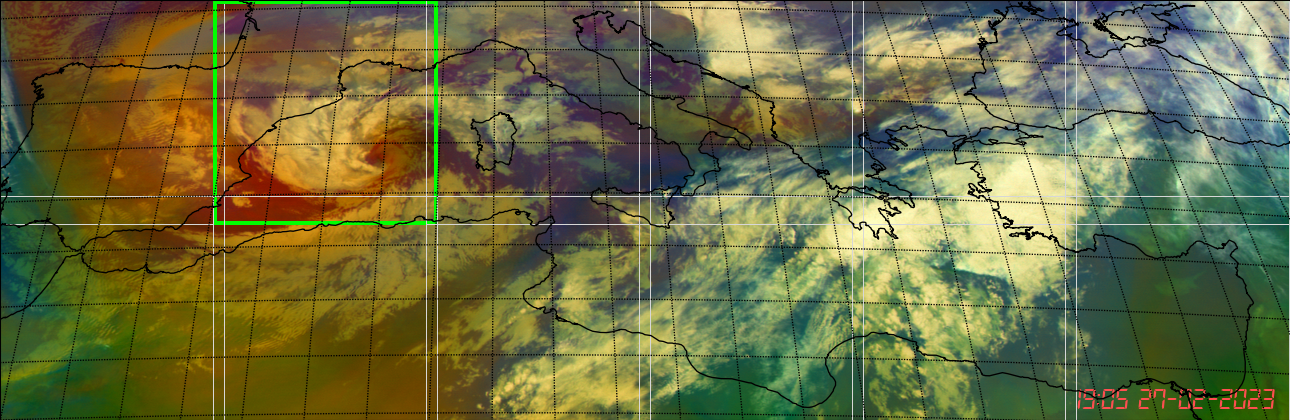

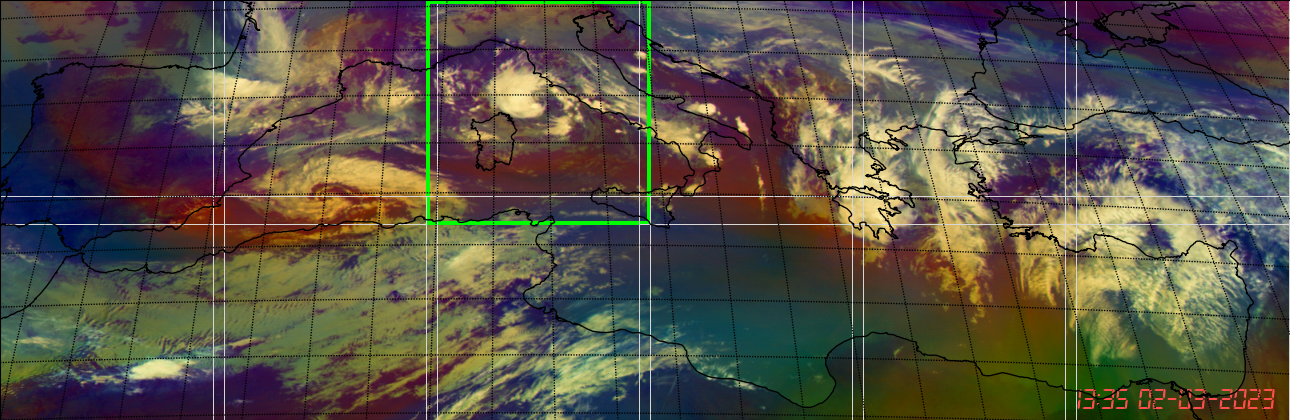

In [144]:
if start.value == end.value:
    print("Inizio e fine sono uguali")
if not start.value or not end.value:
    print("Inizio o fine non sono stati selezionati.")

# check if file exists
start_frame = frames_dir / start.value
if not os.path.exists(start_frame):
    print(f"Il file {start.value} non esiste nella cartella {frames_dir}")
# check for end frame
end_frame = frames_dir / end.value
if not os.path.exists(end_frame):
    print(f"Il file {end.value} non esiste nella cartella {frames_dir}")

# display the selected frames here in jupyter with pillow
print(f"Visualizzo i frame {start_frame} e {end_frame}")
img = Image.open(start_frame)
display(img)
img = Image.open(end_frame)
display(img)


In [145]:
new_start = pd.to_datetime(datetime(2023,2,27,19,0))
new_end = pd.to_datetime(datetime(2023,3,2,13,30))
new_limits = {'name': id, 'new_start': new_start, 'new_end': new_end}
lista_nuove_date.append(new_limits)


In [146]:
df_new_limits = pd.DataFrame(lista_nuove_date)
df_new_limits

id           new_start             new_end      name
0   7001358 2012-04-13 04:15:00 2012-04-14 21:00:00       NaN
1   7001421 2013-11-18 22:00:00 2013-11-20 09:00:00       NaN
2   7001500 2015-09-30 21:25:00 2015-10-01 21:00:00       NaN
3   7001466 2014-11-30 06:25:00 2014-12-03 06:30:00       NaN
4   7001521 2016-02-28 23:20:00 2016-03-01 08:05:00       NaN
5   7001715 2020-12-13 08:20:00 2020-12-16 13:45:00       NaN
6   7001674 2019-11-10 09:30:00 2019-11-11 17:30:00       NaN
7   7001716 2020-12-25 10:35:00 2020-12-27 10:50:00       NaN
8   7001702 2020-09-14 23:50:00 2020-09-18 19:40:00       NaN
9   7001575 2017-11-16 14:45:00 2017-11-18 12:40:00       NaN
10  7001542 2016-10-28 06:30:00 2016-10-31 01:50:00       NaN
11  7001461 2014-11-07 00:10:00 2014-11-08 14:00:00       NaN
12  7001328 2011-11-05 22:55:00 2011-11-08 08:05:00       NaN
13  7001283 2010-10-12 12:55:00 2010-10-13 13:25:00       NaN
14      NaN 2021-10-28 10:35:00 2021-10-30 13:00:00    Apollo
15      NaN 2021-11-08 10:20:00 2021-11-09 06:35:00      Blas
16      NaN 2023-09-05 03:20:00 2023-09-10 02:00:00    Daniel
17      NaN 2023-02-27 19:00:00 2023-03-02 13:30:00  Juliette

In [147]:
df_new_limits.to_csv('new_cyc_limits.csv', index=False)